# Text Classification on BBC Articles Full Text and Category Dataset

## Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, confusion_matrix
print("Done")

Done


## Load the Dataset

In [39]:
bbc_data = pd.read_csv('bbc-text.csv')

In [40]:
bbc_data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


## EDA and Visualization

In [41]:
bbc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [42]:
# Check for missing values
missing_values = bbc_data.isnull().sum()

# Check the distribution of the categories
category_distribution = bbc_data['category'].value_counts()

print(missing_values)
print()
print(category_distribution)

category    0
text        0
dtype: int64

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


### Plot the distribution of news articles across categories

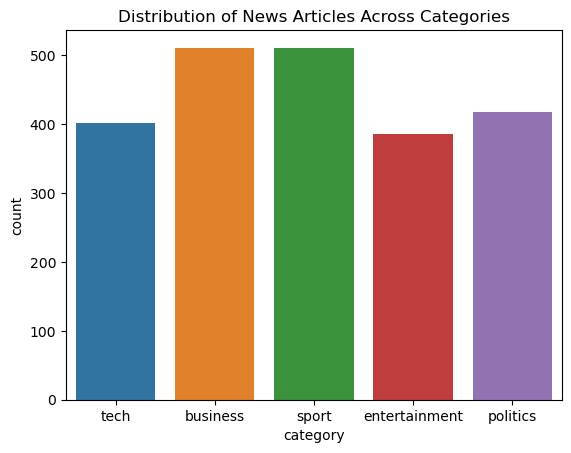

In [43]:
sns.countplot(data=bbc_data, x='category')
plt.title('Distribution of News Articles Across Categories')
plt.show()

### Plot the distribution of article length across categories

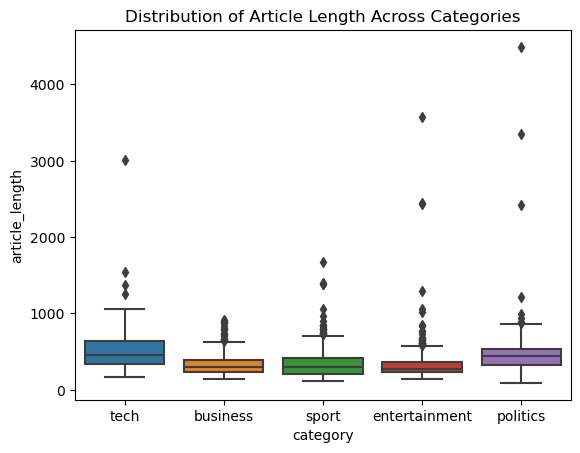

In [44]:
bbc_data['article_length'] = bbc_data['text'].apply(lambda x: len(x.split()))
sns.boxplot(data=bbc_data, x='category', y='article_length')
plt.title('Distribution of Article Length Across Categories')
plt.show()

## Data Preprocessing

### Predefined list of common English stopwords

In [45]:
stopwords_list = [
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at",
    "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can't", "cannot", "could",
    "couldn't", "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during", "each", "few", "for",
    "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's",
    "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm",
    "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me", "more", "most", "mustn't",
    "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours",
    "ourselves", "out", "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so",
    "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
    "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until",
    "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when",
    "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would",
    "wouldn't", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"
]

### Text preprocessing function

In [46]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [token for token in tokens if token not in stopwords_list]
    return ' '.join(tokens)

bbc_data['cleaned_text'] = bbc_data['text'].apply(preprocess_text)

In [47]:
bbc_data.head()

,category,text,article_length,cleaned_text
0,tech,tv future in the hands of viewers with home th...,737,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,300,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,246,tigers wary farrell gamble leicester say will ...
3,sport,yeading face newcastle in fa cup premiership s...,341,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,ocean s twelve raids box office ocean s twelve...


## Text Vectorization

In [48]:
X = bbc_data['cleaned_text']
y = bbc_data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Model Training and Evaluation

### Multinomial Naive Bayes

In [49]:
clf_nb = MultinomialNB().fit(X_train_tfidf, y_train)
y_pred_nb = clf_nb.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
class_labels_nb = sorted(list(set(y_test).union(set(y_pred_nb))))

### Logistic Regression

In [50]:
clf_lr = LogisticRegression(max_iter=1000).fit(X_train_tfidf, y_train)
y_pred_lr = clf_lr.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
class_labels_lr = sorted(list(set(y_test).union(set(y_pred_lr))))

### Random Forest

In [51]:
clf_rf = RandomForestClassifier().fit(X_train_tfidf, y_train)
y_pred_rf = clf_rf.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_labels_rf = sorted(list(set(y_test).union(set(y_pred_rf))))

### SVM

In [52]:
clf_svm = SVC(kernel='rbf', C=1.0).fit(X_train_tfidf, y_train)
y_pred_svm = clf_svm.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
class_labels_svm  = sorted(list(set(y_test).union(set(y_pred_svm))))

### Display Accuracies

In [53]:
print(f"Accuracy of Multinomial Naive Bayes: {accuracy_nb:.3f}")
print(f"Accuracy of Logistic Regression: {accuracy_lr:.3f}")
print(f"Accuracy of Random Forest: {accuracy_rf:.3f}")
print(f"Accuracy of SVM: {accuracy_svm:.3f}")

Accuracy of Multinomial Naive Bayes: 0.966
Accuracy of Logistic Regression: 0.971
Accuracy of Random Forest: 0.944
Accuracy of SVM: 0.980


### Adding Precision, Recall, and F1-score Evaluation

In [54]:
# Precision, Recall, F1-Score for Multinomial Naive Bayes
report_nb = classification_report(y_test, y_pred_nb, target_names=bbc_data['category'].unique())

# Precision, Recall, F1-Score for Multinomial Naive Bayes
report_svm = classification_report(y_test, y_pred_svm, target_names=bbc_data['category'].unique())

# Precision, Recall, F1-Score for Logistic Regression
report_lr = classification_report(y_test, y_pred_lr, target_names=bbc_data['category'].unique())

# Precision, Recall, F1-Score for Random Forest
report_rf = classification_report(y_test, y_pred_rf, target_names=bbc_data['category'].unique())

# Display precision, recall, and F1-Score for all models
print("Multinomial Naive Bayes:\n\n", report_nb)
print("Logistic Regression:\n\n", report_lr)
print("Random Forest:\n\n", report_rf)

print("SVM:\n\n", report_svm)

Multinomial Naive Bayes:

                precision    recall  f1-score   support

         tech       0.96      0.94      0.95       101
     business       1.00      0.91      0.95        81
        sport       0.93      0.99      0.96        83
entertainment       0.99      1.00      0.99        98
     politics       0.95      0.99      0.97        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

Logistic Regression:

                precision    recall  f1-score   support

         tech       0.95      0.94      0.95       101
     business       1.00      0.95      0.97        81
        sport       0.94      0.99      0.96        83
entertainment       0.98      1.00      0.99        98
     politics       0.99      0.98      0.98        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted 

## Additional Metrics

### Convert category labels to numbers for MAE, MSE, and RMSE calculations

In [55]:
y_test_numerical = y_test.astype('category').cat.codes
pred_nb_numerical = pd.Series(y_pred_nb).astype('category').cat.codes
pred_lr_numerical = pd.Series(y_pred_lr).astype('category').cat.codes
pred_rf_numerical = pd.Series(y_pred_rf).astype('category').cat.codes
pred_svm_numerical = pd.Series(y_pred_svm).astype('category').cat.codes

### MAE, MSE, RMSE for All Models

In [56]:
# MAE, MSE, RMSE for Multinomial Naive Bayes
mae_nb = mean_absolute_error(y_test_numerical, pred_nb_numerical)
mse_nb = mean_squared_error(y_test_numerical, pred_nb_numerical)
rmse_nb = np.sqrt(mse_nb)

# MAE, MSE, RMSE for Logistic Regression
mae_lr = mean_absolute_error(y_test_numerical, pred_lr_numerical)
mse_lr = mean_squared_error(y_test_numerical, pred_lr_numerical)
rmse_lr = np.sqrt(mse_lr)

# MAE, MSE, RMSE for Random Forest
mae_rf = mean_absolute_error(y_test_numerical, pred_rf_numerical)
mse_rf = mean_squared_error(y_test_numerical, pred_rf_numerical)
rmse_rf = np.sqrt(mse_rf)

# MAE, MSE, RMSE for Random Forest
mae_svm = mean_absolute_error(y_test_numerical, pred_svm_numerical)
mse_svm = mean_squared_error(y_test_numerical, pred_svm_numerical)
rmse_svm = np.sqrt(mse_svm)

### Display MAE, MSE, RMSE for All Models

In [57]:
print(f"MAE for Multinomial Naive Bayes: {mae_nb:.3f}")
print(f"MSE for Multinomial Naive Bayes: {mse_nb:.3f}")
print(f"RMSE for Multinomial Naive Bayes: {rmse_nb:.3f}")
print(f"MAE for Logistic Regression: {mae_lr:.3f}")
print(f"MSE for Logistic Regression: {mse_lr:.3f}")
print(f"RMSE for Logistic Regression: {rmse_lr:.3f}")
print(f"MAE for Random Forest: {mae_rf:.3f}")
print(f"MSE for Random Forest: {mse_rf:.3f}")
print(f"RMSE for Random Forest: {rmse_rf:.3f}")
print(f"MAE for SVM: {mae_svm:.3f}")
print(f"MSE for SVM: {mse_svm:.3f}")
print(f"RMSE for SVM: {rmse_svm:.3f}")

MAE for Multinomial Naive Bayes: 0.067
MSE for Multinomial Naive Bayes: 0.162
RMSE for Multinomial Naive Bayes: 0.402
MAE for Logistic Regression: 0.058
MSE for Logistic Regression: 0.139
RMSE for Logistic Regression: 0.373
MAE for Random Forest: 0.115
MSE for Random Forest: 0.294
RMSE for Random Forest: 0.543
MAE for SVM: 0.038
MSE for SVM: 0.079
RMSE for SVM: 0.280


### Confusion Matrices for All Models

In [58]:
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=bbc_data['category'].unique())
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=bbc_data['category'].unique())
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=bbc_data['category'].unique())
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=bbc_data['category'].unique())

### Plot Confusion Matrices

#### Multinomial Naive Bayes

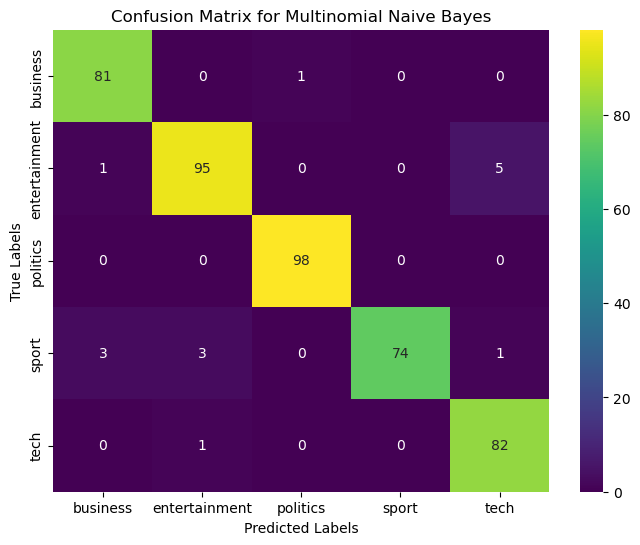

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, xticklabels=class_labels_nb, yticklabels=class_labels_nb, fmt='d', cmap="viridis")
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Logistic Regression

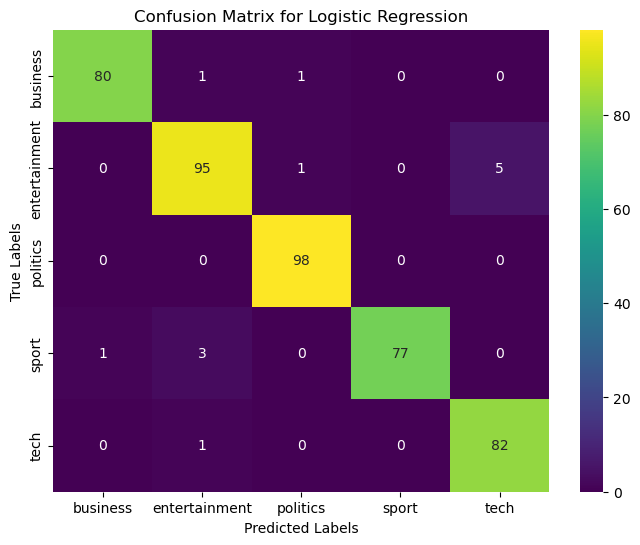

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, xticklabels=class_labels_lr, yticklabels=class_labels_lr,fmt='d', cmap="viridis")
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Random Forest

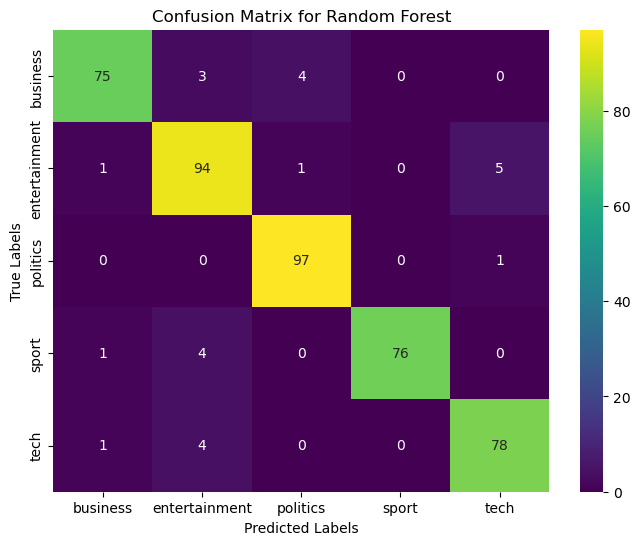

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, xticklabels=class_labels_rf, yticklabels=class_labels_rf, fmt='d', cmap="viridis")
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### SVM

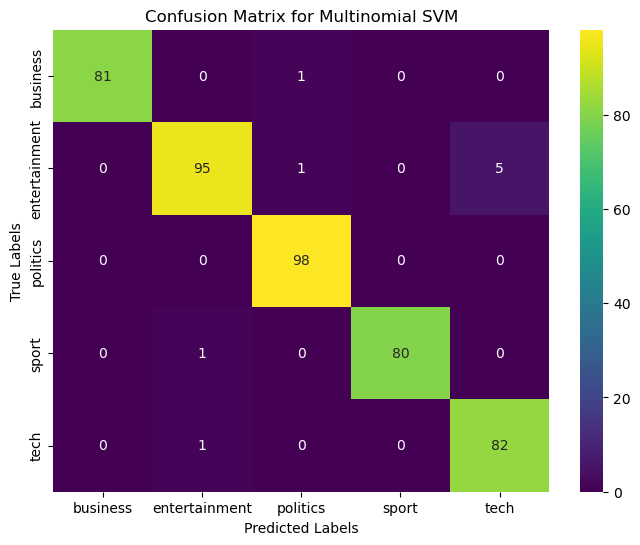

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, xticklabels=class_labels_svm, yticklabels=class_labels_svm, fmt='d', cmap="viridis")
plt.title('Confusion Matrix for Multinomial SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [69]:
print()
print("Confusion Matrix Logistic Regression:\n", cm_lr)
print("Confusion Matrix Naive Bayes:\n", cm_nb)
print("Confusion Matrix SVM:\n", cm_svm)
print("Confusion Matrix Random Forest:\n", cm_rf)


Confusion Matrix Logistic Regression:
 [[80  1  1  0  0]
 [ 0 95  1  0  5]
 [ 0  0 98  0  0]
 [ 1  3  0 77  0]
 [ 0  1  0  0 82]]
Confusion Matrix Naive Bayes:
 [[81  0  1  0  0]
 [ 1 95  0  0  5]
 [ 0  0 98  0  0]
 [ 3  3  0 74  1]
 [ 0  1  0  0 82]]
Confusion Matrix SVM:
 [[81  0  1  0  0]
 [ 0 95  1  0  5]
 [ 0  0 98  0  0]
 [ 0  1  0 80  0]
 [ 0  1  0  0 82]]
Confusion Matrix Random Forest:
 [[75  3  4  0  0]
 [ 1 94  1  0  5]
 [ 0  0 97  0  1]
 [ 1  4  0 76  0]
 [ 1  4  0  0 78]]


In [70]:
class_labels_rf

['business', 'entertainment', 'politics', 'sport', 'tech']

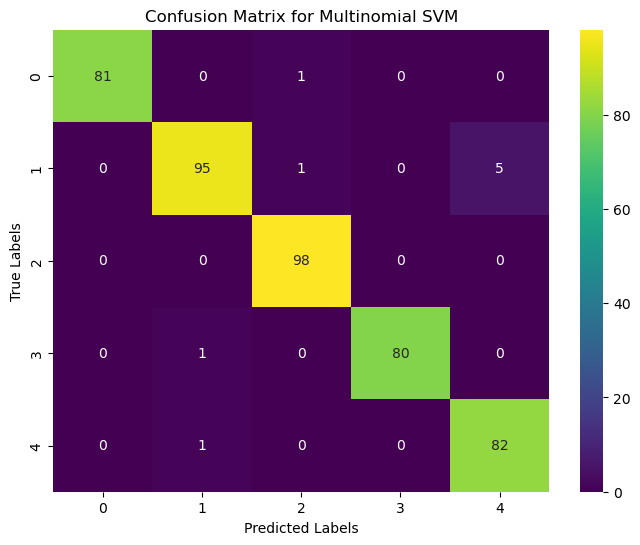

['business' 'entertainment' 'politics' 'sport' 'tech']
The order of labels in class_labels matches the order in the confusion matrix.


In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="viridis")
plt.title('Confusion Matrix for Multinomial SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


labels_in_confusion_matrix = np.unique(y_test)
print(labels_in_confusion_matrix)
if np.array_equal(class_labels_rf, labels_in_confusion_matrix):
    print("The order of labels in class_labels matches the order in the confusion matrix.")
else:
    print("The order of labels in class_labels does not match the order in the confusion matrix.")



### Thank you For Your Time